<a href="https://colab.research.google.com/github/Aniri7777/hello-world/blob/main/thirth_january_deeplearning_beginning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jan  4 18:49:58 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

from sklearn.datasets import load_iris

from tensorflow.keras.datasets import mnist

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
gpu = tf.config.list_physical_devices("GPU")[0]

In [5]:
tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
a = tf.constant(15)
b = tf.constant(38)

In [7]:
a, b

(<tf.Tensor: shape=(), dtype=int32, numpy=15>,
 <tf.Tensor: shape=(), dtype=int32, numpy=38>)

In [8]:
type(a)

tensorflow.python.framework.ops.EagerTensor

In [9]:
tf.multiply(2, a)

<tf.Tensor: shape=(), dtype=int32, numpy=30>

In [10]:
tf.multiply(3, b)

<tf.Tensor: shape=(), dtype=int32, numpy=114>

In [11]:
tf.add(tf.multiply(2, a), tf.multiply(3, b)) #събиране - add

<tf.Tensor: shape=(), dtype=int32, numpy=144>

In [12]:
tf.pow(tf.add(tf.multiply(2, a), tf.multiply(3, b)), 2) # повдигане на някаква степен - pow(..., 2)

<tf.Tensor: shape=(), dtype=int32, numpy=20736>

In [13]:
2 * a

<tf.Tensor: shape=(), dtype=int32, numpy=30>

In [14]:
a = tf.constant([2, 15, 21, -244, 0, 4])
b = tf.constant([3, 2, 20, 200, 18, 15])

In [15]:
tf.pow(tf.add(tf.multiply(2, a), tf.multiply(3, b)), 2)

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([  169,  1296, 10404, 12544,  2916,  2809], dtype=int32)>

In [16]:
2 * a

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([   4,   30,   42, -488,    0,    8], dtype=int32)>

In [17]:
(2 * a + 3 * b) ** 2 # Това също работи и пак връща тензор и умножение на тензор с цисло

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([  169,  1296, 10404, 12544,  2916,  2809], dtype=int32)>

In [18]:
tf.random.uniform((5, 8), 0, 20) # произволна тензорна матрица 5 на 8, със цисла от 0 до 20

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 6.7395043 , 12.626513  ,  6.1144137 ,  4.160371  ,  8.163216  ,
         5.6954074 , 17.230902  ,  4.2763305 ],
       [13.283331  , 19.484486  , 16.663857  ,  2.2935843 ,  8.225894  ,
        19.132698  , 18.135775  ,  4.2753506 ],
       [ 8.578501  , 18.013252  ,  6.9714046 , 16.839903  ,  9.68232   ,
        15.026503  ,  9.143898  ,  3.687923  ],
       [ 4.21103   , 17.743904  ,  5.446856  , 17.065783  ,  5.048561  ,
        11.956282  , 12.948947  ,  8.317759  ],
       [15.321674  , 10.204134  ,  7.0763016 , 12.8052635 ,  0.21111488,
        15.906164  , 13.250041  , 10.557758  ]], dtype=float32)>

In [19]:
a = tf.random.uniform((5, 8), 0, 20)
b = tf.random.uniform((5, 8), 0, 20)

In [20]:
a, b

(<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
 array([[19.238552 , 17.258701 , 12.673351 ,  4.6410537, 17.924965 ,
          7.9549503,  9.631424 ,  3.7448883],
        [ 5.8578634, 15.653315 , 18.476248 , 10.186893 , 16.44836  ,
          9.013254 , 14.451227 , 14.09816  ],
        [ 1.2499213,  5.907433 , 19.309265 ,  3.6096191, 19.955046 ,
          5.0841165,  9.272726 ,  4.7123933],
        [ 1.3851404, 12.901497 , 14.265507 ,  3.9484239,  5.034249 ,
         18.24334  ,  5.685203 , 18.437588 ],
        [18.895988 ,  3.140149 ,  9.360428 ,  0.9963417,  9.935696 ,
         16.963043 ,  2.721467 ,  7.527063 ]], dtype=float32)>,
 <tf.Tensor: shape=(5, 8), dtype=float32, numpy=
 array([[13.325748  ,  3.2760453 , 14.976656  ,  3.0750155 , 11.85544   ,
          3.064382  , 12.674639  ,  9.234252  ],
        [10.51235   , 19.903759  , 15.116305  ,  6.0881543 , 17.063263  ,
         16.189907  , 14.103601  ,  2.7281475 ],
        [ 8.152531  ,  9.386103  , 15.374341  ,  0.82986593, 14

In [21]:
(2 * a + 3 * b) ** 2

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[6155.0845 , 1966.5269 , 4938.8105 ,  342.5147 , 5100.2812 ,
         630.16296, 3281.7737 , 1238.5143 ],
       [1870.8027 , 8284.259  , 6773.5215 , 1492.9146 , 7070.541  ,
        4435.0576 , 5071.328  , 1323.5597 ],
       [ 726.7033 , 1597.8547 , 7181.131  ,   94.26149, 7114.5913 ,
         970.54456, 3741.7795 ,  457.1148 ],
       [3628.9731 , 1196.1036 , 3738.0352 ,  349.76352,  224.16284,
        2345.8865 , 3499.146  , 8248.958  ],
       [2312.8188 , 4178.9883 , 5828.359  , 1697.111  , 2369.565  ,
        7529.4336 ,  963.23206, 5278.5815 ]], dtype=float32)>

In [22]:
# Гарантираме си, че функцията ще създаде граф или тензор:
@tf.function
def compute(a, b):
  return (2 * a + 3 * b) ** 2

In [23]:
compute(2, 3)

<tf.Tensor: shape=(), dtype=int32, numpy=169>

In [24]:
compute(tf.constant([2]), tf.constant([3]))

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([169], dtype=int32)>

In [25]:
compute(tf.constant([2]), tf.constant([3])).numpy()

array([169], dtype=int32)

In [26]:
compute(a, b) / 100000

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[0.06155084, 0.01966527, 0.04938811, 0.00342515, 0.05100281,
        0.00630163, 0.03281774, 0.01238514],
       [0.01870803, 0.08284259, 0.06773522, 0.01492915, 0.07070541,
        0.04435058, 0.05071328, 0.0132356 ],
       [0.00726703, 0.01597855, 0.07181131, 0.00094261, 0.07114591,
        0.00970545, 0.03741779, 0.00457115],
       [0.03628973, 0.01196104, 0.03738035, 0.00349764, 0.00224163,
        0.02345886, 0.03499146, 0.08248958],
       [0.02312819, 0.04178988, 0.05828359, 0.01697111, 0.02369565,
        0.07529434, 0.00963232, 0.05278581]], dtype=float32)>

In [27]:
x = tf.constant(5.0)

In [28]:
with tf.GradientTape() as tape:
  tape.watch(x)
  y = x ** 2
  grad_y = tape.gradient(y, x)

In [29]:
grad_y # Получаваме първата производна на х на втора, т.е 2 пъти х = 10 в случая

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [30]:
with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.sin(x ** 2)
  grad_y = tape.gradient(y, x)

In [31]:
grad_y

<tf.Tensor: shape=(), dtype=float32, numpy=9.912028>

In [32]:
# Gradient decent looks like
#with tf.GradientTape() as tape:
#  grad_y = tape.gradient(loss, model.trainable_params)

In [33]:
iris_attributes, iris_labels = load_iris().data, load_iris().target

In [34]:
iris_attributes.shape[1]

4

In [35]:
num_attributes = iris_attributes.shape[1]
num_classes = len(set(iris_labels))

In [36]:
logistic_regression = Sequential([
    Input(shape = (num_attributes,)),
    Dense(num_classes, activation = "softmax")
])

In [37]:
logistic_regression.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
logistic_regression.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy"
)

In [39]:
logistic_regression.fit(iris_attributes, iris_labels, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 2.7327
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1193 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0335 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9091 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8340 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8312 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7593 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7420 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6242 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6059 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5493 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4700 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4715 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3752 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3180 
Epoch 16/100
5/5 ━━

In [40]:
iris_attributes_for_regression = iris_attributes[:, :-1]
iris_targets_for_regression = iris_attributes[:, -1]

In [41]:
linear_regression = Sequential([
    Input(shape=(iris_attributes_for_regression.shape[1],)),  # Use the shape of the data
    Dense(1)
])

In [42]:
linear_regression.compile(
    optimizer = "sgd",
    loss = "mse"
)

In [43]:
linear_regression.fit(iris_attributes_for_regression, iris_targets_for_regression, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 10.3406
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4357 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3505 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2386 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2476 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2209 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1970 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2007 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2105 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1490 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1740 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1819 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1689 
Epoch 14/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1752 
Epoch 15/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1301 
Epoch 16/100
5/5 ━

In [44]:
linear_regression.predict(iris_attributes_for_regression)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[ 0.2499577 ],
       [ 0.3856167 ],
       [ 0.23982699],
       [ 0.30865604],
       [ 0.19090714],
       [ 0.25641423],
       [ 0.17221333],
       [ 0.2910983 ],
       [ 0.30787233],
       [ 0.37705356],
       [ 0.27354056],
       [ 0.27318835],
       [ 0.36281756],
       [ 0.16575678],
       [ 0.17291789],
       [ 0.08817761],
       [ 0.14566095],
       [ 0.2499577 ],
       [ 0.36106318],
       [ 0.1688916 ],
       [ 0.4376716 ],
       [ 0.20514302],
       [-0.01104276],
       [ 0.4055255 ],
       [ 0.35625327],
       [ 0.46379244],
       [ 0.31878662],
       [ 0.30044514],
       [ 0.30900827],
       [ 0.32289195],
       [ 0.38194275],
       [ 0.38229495],
       [ 0.08293633],
       [ 0.08739413],
       [ 0.37705356],
       [ 0.28053623],
       [ 0.31346604],
       [ 0.168108  ],
       [ 0.24393256],
       [ 0.31389743],
       [ 0.19947024],
       [ 0.52049196],
       [ 0.17142959],
       [ 0.2825352 ],
       [ 0.27964485],
       [ 0

Deep Feed-Forward Neutral Network

In [45]:
((mnist_attributes_train, mnist_labels_train), (mnist_attributes_test, mnist_labels_test))= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [46]:
mnist_attributes_train.shape, mnist_labels_train.shape, mnist_attributes_test.shape, mnist_labels_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

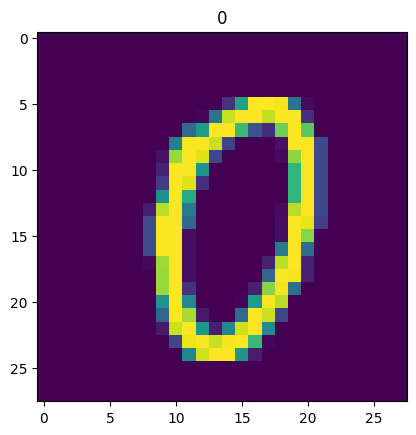

In [47]:
index = 1
plt.imshow(mnist_attributes_train[1000])
plt.title(mnist_labels_train[1000])
plt.show()